In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import env


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

import wrangle3

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [3]:
train, X_train, y_train, X_validate, y_validate, X_test, y_test=wrangle3.wrangle()

In [4]:
X_train.head()

,Unnamed: 0,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,county,age,age_bin,taxrate,acres,acres_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,cola,logerror_bins,baseline,scaled_latitude,scaled_longitude,scaled_bathroomcnt,scaled_taxrate,scaled_bedroomcnt,scaled_lotsizesquarefeet,scaled_age,scaled_acres,scaled_bath_bed_ratio,scaled_calculatedfinishedsquarefeet,area_cluster
21580,21580,11204960,3.0,4.0,2000.0,6037.0,34561695.0,-118082751.0,6999.0,40227.0,3101.0,97328.0,1987.0,104877.0,131090.0,26213.0,2623.93,Los_Angeles,30.0,0.200,2.001625,0.160675,0.2,0.4,52.438500,0.2,3.745249,0.1,0.750000,0,"(-0.05, 0.05]",0.017913,0.829634,0.731775,0.333333,0.203380,0.500000,0.008825,0.213235,0.008825,0.196429,0.172850,2
32781,32781,14323862,6.0,6.0,7393.0,6059.0,33601524.0,-117845231.0,24000.0,40009.0,1286.0,96975.0,1995.0,1556016.0,2449943.0,893927.0,29921.84,Orange,22.0,0.200,1.221328,0.550964,0.4,0.9,210.471527,0.6,37.246958,0.3,1.000000,0,"(0.05, 0.2]",0.017913,0.177142,0.856593,0.833333,0.123723,0.833333,0.031010,0.154412,0.031010,0.285714,0.741252,1
33161,33161,12205584,2.0,3.0,1778.0,6037.0,33966002.0,-118298627.0,4948.0,12447.0,3101.0,96025.0,1936.0,87000.0,347000.0,260000.0,4248.21,Los_Angeles,81.0,0.600,1.224268,0.113590,0.1,0.4,48.931384,0.1,52.546483,0.4,0.666667,1,"(-0.05, 0.05]",0.017913,0.424826,0.618331,0.166667,0.124023,0.333333,0.006149,0.588235,0.006149,0.166667,0.149452,3
45785,45785,12078527,3.0,4.0,2777.0,6037.0,34166013.0,-118218530.0,9989.0,45457.0,3101.0,96327.0,1990.0,322342.0,875355.0,553013.0,9603.39,Los_Angeles,27.0,0.200,1.097085,0.229316,0.2,0.6,116.075621,0.4,55.362198,0.4,0.750000,0,"(0.05, 0.2]",0.017913,0.560745,0.660422,0.333333,0.111039,0.500000,0.012727,0.191176,0.012727,0.196429,0.254743,0
45820,45820,14266520,3.0,4.0,1939.0,6059.0,33706702.0,-117898677.0,6028.0,47568.0,1286.0,97004.0,1971.0,139321.0,327623.0,188302.0,3923.98,Orange,46.0,0.333,1.197712,0.138384,0.1,0.4,71.851986,0.2,31.237890,0.3,0.750000,0,"(-0.05, 0.05]",0.017913,0.248617,0.828507,0.333333,0.121312,0.500000,0.007558,0.330882,0.007558,0.196429,0.166421,1


In [ ]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [ ]:
X_train.head()

In [7]:
X_train.shape

(36384, 43)

In [ ]:
X_train.county.value_counts()

In [ ]:
X_train.sample(50)

In [ ]:
df = X_train

In [ ]:
# Viz distributions after outliers removed

for col in df.columns:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

## Clustering

In [ ]:
# list of variables I will cluster on. 
cluster_vars = ['scaled_latitude', 'scaled_longitude', 'age_bin']
cluster_name = 'area_cluster'
k_range = range(2,20)

In [ ]:
def find_k(X_train, cluster_vars, k_range):
    sse = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k)

        # X[0] is our X_train dataframe..the first dataframe in the list of dataframes stored in X. 
        kmeans.fit(X_train[cluster_vars])

        # inertia: Sum of squared distances of samples to their closest cluster center.
        sse.append(kmeans.inertia_) 

    # compute the difference from one k to the next
    delta = [round(sse[i] - sse[i+1],0) for i in range(len(sse)-1)]

    # compute the percent difference from one k to the next
    pct_delta = [round(((sse[i] - sse[i+1])/sse[i])*100, 1) for i in range(len(sse)-1)]

    # create a dataframe with all of our metrics to compare them across values of k: SSE, delta, pct_delta
    k_comparisons_df = pd.DataFrame(dict(k=k_range[0:-1], 
                             sse=sse[0:-1], 
                             delta=delta, 
                             pct_delta=pct_delta))

    # plot k with inertia
    plt.plot(k_comparisons_df.k, k_comparisons_df.sse, 'bx-')
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.title('The Elbow Method to find the optimal k\nFor which k values do we see large decreases in SSE?')
    plt.show()

    # plot k with pct_delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.pct_delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Percent Change')
    plt.title('For which k values are we seeing increased changes (%) in SSE?')
    plt.show()

    # plot k with delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Absolute Change in SSE')
    plt.title('For which k values are we seeing increased changes (absolute) in SSE?')
    plt.show()

    return k_comparisons_df

In [ ]:
find_k(X_train, cluster_vars, k_range)


In [ ]:
# Make 6 area clusters

k = 6
# as reminders: 
cluster_vars = ['scaled_latitude', 'scaled_longitude', 'age_bin']
cluster_name = 'area_cluster'

In [ ]:
def create_clusters(X_train, k, cluster_vars):
    # create kmean object
    kmeans = KMeans(n_clusters=k, random_state = 13)

    # fit to train and assign cluster ids to observations
    kmeans.fit(X_train[cluster_vars])

    return kmeans
    

In [ ]:
kmeans = create_clusters(X_train, k, cluster_vars)


In [ ]:
# get the centroids for each distinct cluster...

def get_centroids(kmeans, cluster_vars, cluster_name):
    # get the centroids for each distinct cluster...

    centroid_col_names = ['centroid_' + i for i in cluster_vars]

    centroid_df = pd.DataFrame(kmeans.cluster_centers_, 
                               columns=centroid_col_names).reset_index().rename(columns={'index': cluster_name})

    return centroid_df

In [ ]:
centroid_df = get_centroids(kmeans, cluster_vars, cluster_name)


In [ ]:
X_train['area_cluster'] = kmeans.predict(X_train[cluster_vars])

In [ ]:
X_validate['area_cluster'] = kmeans.predict(X_validate[cluster_vars])

In [ ]:
X_train.head()

In [ ]:
# label cluster for each observation in X_train (X[0] in our X list of dataframes), 
# X_validate (X[1]), & X_test (X[2])

def assign_clusters(kmeans, cluster_vars, cluster_name, centroid_df):
    for i in range(len(2)):
        clusters = pd.DataFrame(kmeans.predict(X[i][cluster_vars]), 
                            columns=[cluster_name], index=X[i].index)

        clusters_centroids = clusters.merge(centroid_df, on=cluster_name, copy=False).set_index(clusters.index.values)

        X_train = pd.concat([X[i], clusters_centroids], axis=1)
    return X

In [ ]:
X_train = assign_clusters(kmeans, cluster_vars, cluster_name, centroid_df)


In [5]:
X_train.head()

,Unnamed: 0,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,county,age,age_bin,taxrate,acres,acres_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,cola,logerror_bins,baseline,scaled_latitude,scaled_longitude,scaled_bathroomcnt,scaled_taxrate,scaled_bedroomcnt,scaled_lotsizesquarefeet,scaled_age,scaled_acres,scaled_bath_bed_ratio,scaled_calculatedfinishedsquarefeet,area_cluster
21580,21580,11204960,3.0,4.0,2000.0,6037.0,34561695.0,-118082751.0,6999.0,40227.0,3101.0,97328.0,1987.0,104877.0,131090.0,26213.0,2623.93,Los_Angeles,30.0,0.200,2.001625,0.160675,0.2,0.4,52.438500,0.2,3.745249,0.1,0.750000,0,"(-0.05, 0.05]",0.017913,0.829634,0.731775,0.333333,0.203380,0.500000,0.008825,0.213235,0.008825,0.196429,0.172850,2
32781,32781,14323862,6.0,6.0,7393.0,6059.0,33601524.0,-117845231.0,24000.0,40009.0,1286.0,96975.0,1995.0,1556016.0,2449943.0,893927.0,29921.84,Orange,22.0,0.200,1.221328,0.550964,0.4,0.9,210.471527,0.6,37.246958,0.3,1.000000,0,"(0.05, 0.2]",0.017913,0.177142,0.856593,0.833333,0.123723,0.833333,0.031010,0.154412,0.031010,0.285714,0.741252,1
33161,33161,12205584,2.0,3.0,1778.0,6037.0,33966002.0,-118298627.0,4948.0,12447.0,3101.0,96025.0,1936.0,87000.0,347000.0,260000.0,4248.21,Los_Angeles,81.0,0.600,1.224268,0.113590,0.1,0.4,48.931384,0.1,52.546483,0.4,0.666667,1,"(-0.05, 0.05]",0.017913,0.424826,0.618331,0.166667,0.124023,0.333333,0.006149,0.588235,0.006149,0.166667,0.149452,3
45785,45785,12078527,3.0,4.0,2777.0,6037.0,34166013.0,-118218530.0,9989.0,45457.0,3101.0,96327.0,1990.0,322342.0,875355.0,553013.0,9603.39,Los_Angeles,27.0,0.200,1.097085,0.229316,0.2,0.6,116.075621,0.4,55.362198,0.4,0.750000,0,"(0.05, 0.2]",0.017913,0.560745,0.660422,0.333333,0.111039,0.500000,0.012727,0.191176,0.012727,0.196429,0.254743,0
45820,45820,14266520,3.0,4.0,1939.0,6059.0,33706702.0,-117898677.0,6028.0,47568.0,1286.0,97004.0,1971.0,139321.0,327623.0,188302.0,3923.98,Orange,46.0,0.333,1.197712,0.138384,0.1,0.4,71.851986,0.2,31.237890,0.3,0.750000,0,"(-0.05, 0.05]",0.017913,0.248617,0.828507,0.333333,0.121312,0.500000,0.007558,0.330882,0.007558,0.196429,0.166421,1


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

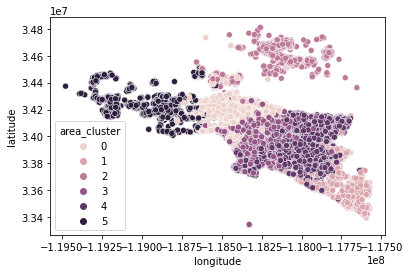

In [6]:
sns.scatterplot(data=X_train, x='longitude', y='latitude', hue='area_cluster')